# VulnCheck SDK for Python

Let's see how we can explore VulnCheck data using the official python client in a Jupyter notebook!

First, we'll query the `botnet` index using the API, and create a dataframes object with our data.

In [1]:
from IPython.core.magic import register_cell_magic
from IPython.display import Markdown
import vulncheck_sdk
import matplotlib.pyplot as plt
import pandas as pd
import os
from itables import init_notebook_mode, show
import itables.options as opt

opt.dom = "tpir"
opt.style = "table-layout:auto;width:auto"
init_notebook_mode(all_interactive=True, connected=True)

@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

In [2]:

DEFAULT_HOST = "https://api.vulncheck.com"
DEFAULT_API = DEFAULT_HOST + "/v3"
TOKEN = os.environ["VULNCHECK_API_TOKEN"]

configuration = vulncheck_sdk.Configuration(host=DEFAULT_API)
configuration.api_key["Bearer"] = TOKEN

with vulncheck_sdk.ApiClient(configuration) as api_client:
    indices_client = vulncheck_sdk.IndicesApi(api_client)

    body = vulncheck_sdk.ParamsIdxReqParams()

    api_response = indices_client.index_botnets_get(body)

    botnet_names = []
    cve_count = []

    for entry in api_response.data:

        # For this example, let's check out each botnet and the number
        # of unique CVEs associated with it.
        botnet_names.append(entry.botnet_name)
        cve_count.append(len(entry.cve))

df = pd.DataFrame({
    'Botnets': botnet_names,
    'Unique CVEs': cve_count
})

Now let's make a bar chart of unique CVE's for each botnet!

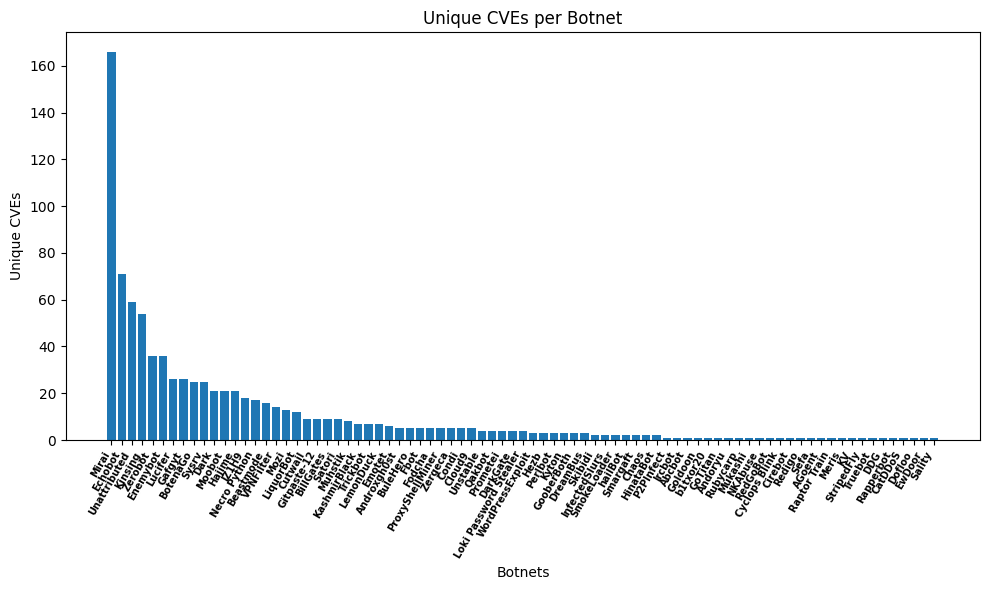

In [3]:
df_sorted = df.sort_values(by='Unique CVEs', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar(df_sorted['Botnets'], df_sorted['Unique CVEs'])

plt.title("Unique CVEs per Botnet")
plt.xlabel("Botnets")
plt.ylabel("Unique CVEs")

plt.xticks(rotation=60, ha='right', fontsize=7, fontweight='bold')

plt.tight_layout()
plt.show()